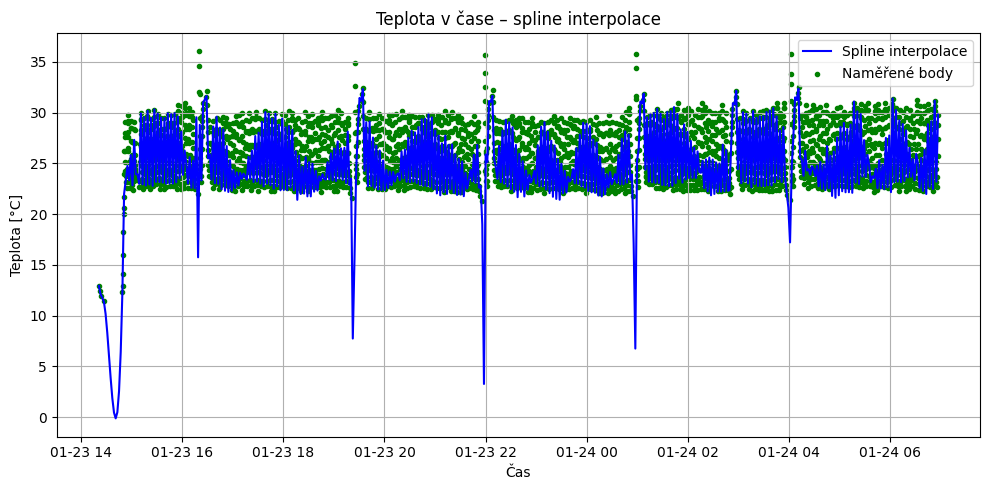

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import numpy as np

# 1) Načtení CSV bez hlavičky
df = pd.read_csv("teplota_log.csv", header=None)

# 2) Pojmenování sloupců
df.columns = ["Time", "Value"]

# 3) Odstranění prázdných řádků
df = df.dropna(how="all")

# 4) Odstranění řádků bez hodnoty
df = df.dropna(subset=["Value"])

# 5) Převod Time na datetime
df["Time"] = pd.to_datetime(df["Time"], errors="coerce")

# 6) Odstranění řádků s nevalidním časem
df = df.dropna(subset=["Time"])

# 7) Seřazení podle času
df = df.sort_values("Time")

# 8) Odstranění duplicitních časů
df = df.drop_duplicates(subset=["Time"])

# 9) Kontrola počtu bodů
if len(df) < 3:
    raise ValueError("Pro spline interpolaci jsou potřeba alespoň 3 body.")

# 10) Převedení času na sekundy
t0 = df["Time"].min()
x = (df["Time"] - t0).dt.total_seconds().values
y = df["Value"].values

# 11) Spline interpolace
cs = CubicSpline(x, y)
x_fine = np.linspace(x.min(), x.max(), 500)
y_fine = cs(x_fine)

# 12) Převod zpět na čas
time_fine = [t0 + pd.Timedelta(seconds=float(s)) for s in x_fine]

# 13) Graf
plt.figure(figsize=(10,5))
plt.plot(time_fine, y_fine, label="Spline interpolace", color="blue")
plt.scatter(df["Time"], df["Value"], color="green", label="Naměřené body", marker=".")
plt.xlabel("Čas")
plt.ylabel("Teplota [°C]")
plt.title("Teplota v čase – spline interpolace")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




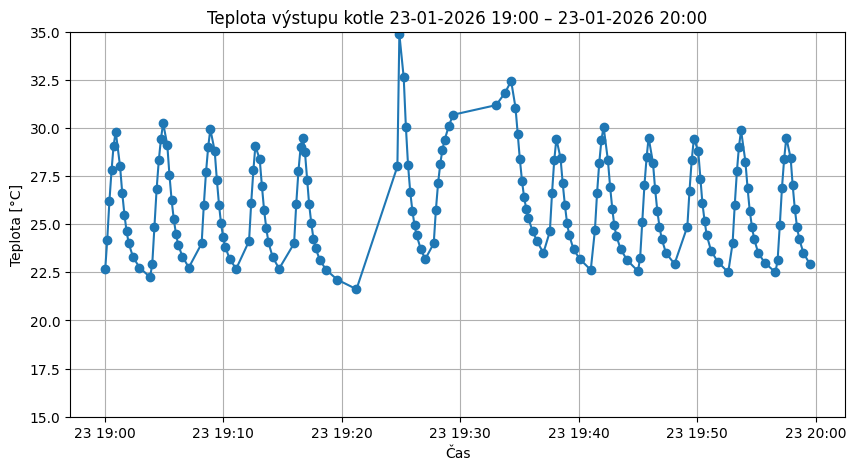

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Načtení CSV bez hlavičky
df = pd.read_csv("teplota_log.csv", header=None)
df.columns = ["Time", "Value"]

# Čištění
df = df.dropna(subset=["Value"])
df["Time"] = pd.to_datetime(df["Time"])
df = df.sort_values("Time")

# Parametry
y_min, y_max = 15, 35
window_hours = 1

# Nastav si hodinu, kterou chceš zobrazit
start_hour = 4.651667   # 0 = první hodina, 1 = druhá, 2 = třetí...

# Výpočet časového okna
start_time = df["Time"].min() + pd.Timedelta(hours=start_hour)
end_time = start_time + pd.Timedelta(hours=window_hours)

# Výběr dat
sub = df[(df["Time"] >= start_time) & (df["Time"] <= end_time)]

# Graf
plt.figure(figsize=(10,5))
plt.plot(sub["Time"], sub["Value"], marker="o")
plt.ylim(y_min, y_max)
# plt.title(f"Teplota {start_time} – {end_time}")
plt.title(f"Teplota výstupu kotle {start_time.strftime('%d-%m-%Y %H:%M')} – {end_time.strftime('%d-%m-%Y %H:%M')}")
plt.xlabel("Čas")
plt.ylabel("Teplota [°C]")
plt.grid(True)
plt.show()
